In [60]:
import skrebate
import pandas as pd
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
def relu(x):
    return x if x>0 else 0

def artificial_scoring(ba, m):
    return ba - .01 * relu(m/5 - 1)

In [10]:
train_art = pd.read_csv('data/artificial_train.data', delim_whitespace=True, header=None)
test_art  = pd.read_csv('data/artificial_valid.data', delim_whitespace=True, header=None)
train_labels = pd.read_csv('data/artificial_train.labels', header=None)
train_labels = (train_labels == 1) + 0

In [41]:
baseline = make_pipeline(StandardScaler(),XGBClassifier())
cross_val_score(baseline, train_art, train_labels, scoring="balanced_accuracy")

array([0.7675, 0.815 , 0.785 , 0.7975, 0.795 ])

In [42]:
baseline.fit(train_art, train_labels)
np.sum(baseline[1].feature_importances_ != 0.)

469

In [50]:
baseline_l1 = make_pipeline(StandardScaler(),XGBClassifier(alpha=10, reg_lambda=10))
baseline_l1.fit(train_art, train_labels)
print(np.sum(baseline_l1[1].feature_importances_ != 0.))
cross_val_score(baseline_l1, train_art, train_labels, scoring="balanced_accuracy")

360


array([0.7575, 0.82  , 0.7375, 0.775 , 0.7775])

In [26]:
pipeline = Pipeline([
    ("feature_selection", skrebate.ReliefF(n_features_to_select=100, n_neighbors=4, n_jobs=-1)),
    ("scaling", StandardScaler()),
    ("clf", XGBClassifier())
])
cross_val_score(pipeline, np.array(train_art).astype("float"), np.array(train_labels).flatten())

array([0.6875, 0.69  , 0.6775, 0.755 , 0.75  ])

In [27]:
pipeline = Pipeline([
    ("feature_selection", skrebate.ReliefF(n_features_to_select=100, n_neighbors=2, n_jobs=-1)),
    ("scaling", StandardScaler()),
    ("clf", XGBClassifier())
])
cross_val_score(pipeline, np.array(train_art).astype("float"), np.array(train_labels).flatten())

array([0.685 , 0.765 , 0.7175, 0.8075, 0.7525])

In [28]:
pipeline = Pipeline([
    ("feature_selection", skrebate.ReliefF(n_features_to_select=20, n_neighbors=4, n_jobs=-1)),
    ("scaling", StandardScaler()),
    ("clf", XGBClassifier())
])
cross_val_score(pipeline, np.array(train_art).astype("float"), np.array(train_labels).flatten())

array([0.7225, 0.7075, 0.7625, 0.64  , 0.7875])

In [29]:
pipeline = Pipeline([
    ("feature_selection", skrebate.ReliefF(n_features_to_select=100, n_neighbors=2, n_jobs=-1)),
    ("scaling", StandardScaler()),
    ("clf", XGBClassifier())
])
cross_val_score(pipeline, np.array(train_art).astype("float"), np.array(train_labels).flatten())

array([0.685 , 0.765 , 0.7175, 0.8075, 0.7525])

In [39]:
pipeline = Pipeline([
    ("feature_selection", skrebate.SURF(n_features_to_select=100, n_jobs=-1)),
    ("scaling", StandardScaler()),
    ("clf", XGBClassifier())
])
cross_val_score(pipeline, np.array(train_art).astype("float"), np.array(train_labels).flatten())

KeyboardInterrupt: 

In [54]:
fs_turf = skrebate.TuRF(
    core_algorithm="ReliefF", n_features_to_select=20, pct=0.5, n_jobs=-1
).fit(
    np.array(train_art).astype("float"), 
    np.array(train_labels).flatten(),
    headers=list(train_art)
)

In [57]:
X_trans = fs_turf.transform(np.array(train_art).astype("float"))

In [58]:
cross_val_score(XGBClassifier(), X_trans, np.array(train_labels).flatten())

array([0.8875, 0.88  , 0.8625, 0.8625, 0.87  ])

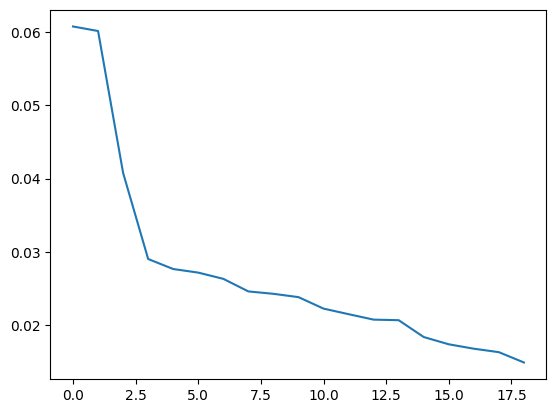

In [75]:
plt.plot(fs_turf.feature_importances_[:-20:-1])

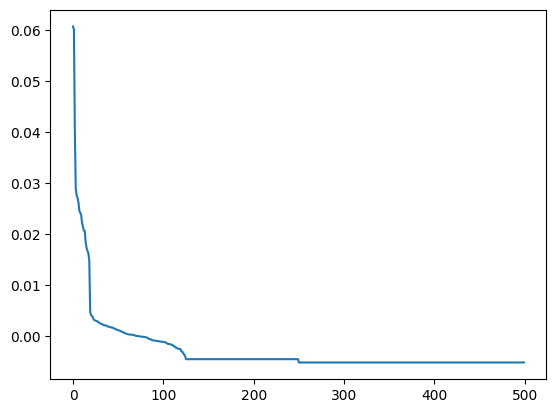

In [83]:
plt.plot(fs_turf.feature_importances_[::-1])

In [77]:
fs_turf.set_params(n_features_to_select=10)

TuRF(core_algorithm='ReliefF', n_jobs=-1)

In [79]:
fs_turf.transform(np.array(train_art).astype("float")).shape

(2000, 10)

In [82]:
fs_turf.top_features_

[475,
 241,
 338,
 336,
 64,
 128,
 105,
 442,
 472,
 378,
 48,
 493,
 453,
 433,
 153,
 318,
 28,
 281,
 451,
 173,
 130,
 277,
 457,
 436,
 83,
 456,
 181,
 10,
 411,
 205,
 148,
 390,
 116,
 172,
 171,
 439,
 416,
 32,
 271,
 104,
 55,
 200,
 46,
 12,
 193,
 79,
 322,
 498,
 358,
 310,
 167,
 197,
 432,
 420,
 225,
 44,
 321,
 72,
 471,
 343,
 151,
 363,
 406,
 139,
 88,
 372,
 275,
 298,
 91,
 394,
 359,
 217,
 126,
 226,
 499,
 243,
 455,
 124,
 324,
 367,
 391,
 429,
 137,
 494,
 369,
 81,
 266,
 34,
 409,
 134,
 117,
 351,
 5,
 365,
 283,
 29,
 196,
 425,
 108,
 54,
 458,
 305,
 170,
 299,
 445,
 496,
 377,
 361,
 229,
 487,
 278,
 410,
 422,
 301,
 431,
 163,
 164,
 122,
 435,
 47,
 120,
 160,
 125,
 35,
 273]

In [90]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf =  RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)
feat_selector.fit(train_art.values, train_labels.values.ravel())


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	478
Iteration: 	9 / 100
Confirmed: 	17
Tentative: 	5
Rejected: 	478
Iteration: 	10 / 100
Confirmed: 	17
Tentative: 	5
Rejected: 	478
Iteration: 	11 / 100
Confirmed: 	17
Tentative: 	5
Rejected: 	478
Iteration: 	12 / 100
Confirmed: 	18
Tentative: 	4
Rejected: 	478
Iteration: 	13 / 100
Confirmed: 	18
Tentative: 	4
Rejected: 	478
Iteration: 	14 / 100
Confirmed: 	18
Tentative: 	4
Rejected: 	478
Iteration: 	15 / 100
Confirmed: 	18
Tentative: 	4
Rejected: 	478
Iteration: 	16 / 100
Confirmed: 	18
Tenta

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=129, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7F763360F340),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F763360F340, verbose=2)

In [92]:
cross_val_score(XGBClassifier(), feat_selector.transform(train_art.values), np.array(train_labels).flatten())

array([0.8725, 0.88  , 0.8575, 0.85  , 0.8575])

In [94]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import balanced_accuracy_score

In [95]:
def art_scorer(est, X, y):
    yhat = est.predict(X)
    return artificial_scoring(
        balanced_accuracy_score(y, yhat),
        np.sum(est.feature_importances_ != 0.)
    )

In [105]:
rfe = RFECV(
    XGBClassifier(),
    step=5,
    min_features_to_select=5,
    scoring=art_scorer
)

In [106]:
rfe.fit(train_art, train_labels)

RFECV(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...),
      min_features_to_select=5, scoring=<function art_scorer at 0x7f76405c85e0>,
      step=5)

In [110]:
rfe.n_features_

10

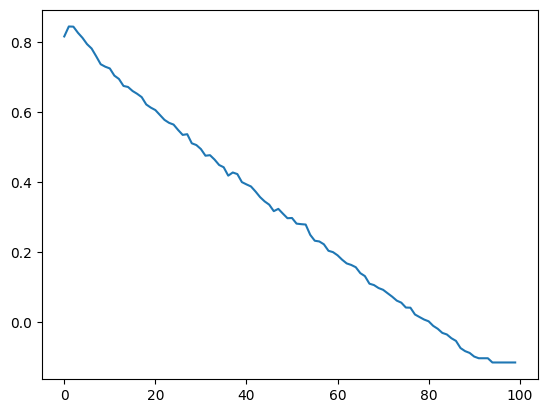

In [109]:
plt.plot(rfe.cv_results_["mean_test_score"])

In [111]:
rfe.cv_results_["mean_test_score"]

array([ 0.8165,  0.845 ,  0.8445,  0.827 ,  0.8125,  0.7945,  0.782 ,
        0.76  ,  0.737 ,  0.73  ,  0.725 ,  0.7045,  0.695 ,  0.675 ,
        0.672 ,  0.6605,  0.6525,  0.643 ,  0.622 ,  0.613 ,  0.606 ,
        0.592 ,  0.578 ,  0.5695,  0.5645,  0.549 ,  0.535 ,  0.537 ,
        0.511 ,  0.506 ,  0.4945,  0.4755,  0.477 ,  0.4644,  0.449 ,
        0.4425,  0.4185,  0.4275,  0.423 ,  0.4   ,  0.3935,  0.3875,
        0.373 ,  0.357 ,  0.3448,  0.3355,  0.317 ,  0.3235,  0.3099,
        0.2968,  0.2974,  0.2813,  0.2798,  0.2787,  0.2493,  0.2324,
        0.2303,  0.2222,  0.2037,  0.1998,  0.1908,  0.1782,  0.1676,
        0.1632,  0.1567,  0.1397,  0.1313,  0.1096,  0.1056,  0.0972,
        0.0921,  0.0822,  0.0724,  0.0612,  0.0553,  0.0414,  0.0409,
        0.0215,  0.0142,  0.0071,  0.002 , -0.011 , -0.0194, -0.0311,
       -0.0356, -0.0464, -0.054 , -0.0745, -0.0832, -0.0884, -0.0988,
       -0.1036, -0.1036, -0.1036, -0.1157, -0.1157, -0.1157, -0.1157,
       -0.1157, -0.1